## Barcelona: Trams from a Small DataFrame

In other notebooks I have established a strategy for taking the .csv data set, reading it into a pandas dataframe, converting it to a geopandas dataframe with a geometry column, filtering the Points into a list which is converted to a LineString object that can be plotted as a street.

In this notebook I'm going to work with the first 1000 lines of the dataframe (370+ streets) to establish a process for doing so and to catch coding errors in a smaller data set. I will probably be pretty brute force to start with but may look for more efficient strategies later.

[Geopandas Reference:](https://geopandas.org/en/stable/index.html)


In [45]:
import geopandas as gpd
import pandas as pd
import numpy as np
import geoplot as gp
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
from IPython.display import display, Image
from shapely.geometry import Point, LineString
import json
import fiona

### Reading the .csv data:

See GeoBarcaCSV notebook for more depth.

In [2]:
streets = pd.read_csv("bcn-geodata/BCN_GrafVial_CSV/BCN_Trams2.csv", sep=",", encoding='latin-1')
#streets.head(10)

### From Pandas to Geopandas

The .csv file is read in as a pandas data frame. For mapping purposes it needs to be converted to a geopandas data frame which basically involves reading the x and y coordinate columns and converting them to shapely Points in a colum named geometry. The new columm is at the end of the data frame.

### Converting the coordinates to pairs:

This method from the [Geopandas manual](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html) did a great job of converting the
```python
tramsFull = gpd.GeoDataFrame(streets, geometry = gpd.points_from_xy(streets.COORD_X,streets.COORD_Y))
tramsFull
```
While I am frustrated that the geometry column is at the end of the frame I am loathe to reorganize the dataframe arbitrarily. For now I will keep it though it is clear from the [pandas indexing method](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) that I could swap data columns around for my convenience if needed.

In [3]:
tramsFull = gpd.GeoDataFrame(streets, geometry = gpd.points_from_xy(streets.COORD_X,streets.COORD_Y))
#tramsFull

In [4]:
tramsFull = gpd.GeoDataFrame(streets, geometry = gpd.points_from_xy(streets.COORD_X,streets.COORD_Y))
tramsFull

,FID,COORD_X,COORD_Y,LONGITUD,ANGLE,C_Tram,C_Nus_I,C_Nus_F,Distric_D,NDistric_D,...,NVia_D,Tram_Dret,Distric_E,NDistric_E,Illa_E,CVia_E,TVia_E,NVia_E,Tram_Esq,geometry
0,0,432128.893,4581047.606,42.615,15.04,T00001B,N00001D,N00002E,1,Ciutat Vella,...,Carrer Pepe Rubianes,2,1,Ciutat Vella,10410,10900,Carrer,Carrer Pepe Rubianes,1,POINT (432128.893 4581047.606)
1,1,432156.649,4581054.946,14.806,14.20,T00002C,N00002E,N00003F,1,Ciutat Vella,...,Carrer Pepe Rubianes,4 <=> 6,1,Ciutat Vella,10421,10900,Carrer,Carrer Pepe Rubianes,3 <=> 5,POINT (432156.649 4581054.946)
2,2,432171.171,4581059.200,15.480,18.40,T00003D,N00003F,N00004G,1,Ciutat Vella,...,Carrer Pepe Rubianes,4 <=> 6,1,Ciutat Vella,10421,10900,Carrer,Carrer Pepe Rubianes,3 <=> 5,POINT (432171.171 4581059.200)
3,3,432185.863,4581063.068,14.969,10.98,T00004E,N00004G,N00005H,1,Ciutat Vella,...,Carrer Pepe Rubianes,8 <=> 8 Z,1,Ciutat Vella,10441,10900,Carrer,Carrer Pepe Rubianes,7 <=> 9,POINT (432185.863 4581063.068)
4,4,432200.396,4581066.659,15.010,16.80,T00005F,N00005H,N00006I,1,Ciutat Vella,...,Carrer Pepe Rubianes,10,1,Ciutat Vella,10441,10900,Carrer,Carrer Pepe Rubianes,7 <=> 9,POINT (432200.396 4581066.659)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,14826,426840.231,4583372.122,37.131,306.71,T21653T,N07106N,N10755R,5,Sarrià-Sant Gervasi,...,Via Augusta,313,5,Sarrià-Sant Gervasi,34491,28000,Via,Via Augusta,313,POINT (426840.231 4583372.122)
14827,14827,426952.780,4583228.384,133.414,312.34,T21654U,N10463I,N10519H,5,Sarrià-Sant Gervasi,...,Carrer Cardenal Sentmenat,2 - 6,5,Sarrià-Sant Gervasi,34421,65301,Carrer,Carrer Cardenal Sentmenat,1 - 5,POINT (426952.780 4583228.384)
14828,14828,433594.464,4583025.419,119.651,314.89,T21656W,N11406D,N08604E,10,Sant Martí,...,Carrer Llacuna,2,10,Sant Martí,5989,183603,Carrer,Carrer Llacuna,1,POINT (433594.464 4583025.419)
14829,14829,433492.108,4582841.885,404.104,45.14,T21657X,N08591Q,N11406D,10,Sant Martí,...,,0,10,Sant Martí,5989,700662,Carrer,Carrer Salvador Espriu,97 <=> 99 - 109,POINT (433492.108 4582841.885)


### Smaller Subset of Frame

In [5]:
tramsSmall = tramsFull.iloc[0:100,:]
#tramsSmall                 

### Extract Unique Names: (delete unwanted)

This is preparatory to generating a new dataframe which has a single row for each unique tram (street). Notice that the 4th name is blank (' ') which seems likely to cause problems. This is how I deleted the 4th element (index 3!) and the confirmation that it is gone.

```python
uniqueTrams = np.delete(uniqueTrams,3)
```

In [6]:
uniqueTrams = tramsSmall['NVia_D'].unique()
print('Unique elements in column "NVia_D" ', len(uniqueTrams))
print(uniqueTrams[0:10])

Unique elements in column "NVia_D"  22
['Carrer Pepe Rubianes' 'Carrer Almirall Aixada' 'Carrer Judici' ' '
 'Carrer Drassana' 'Carrer Mar' 'Carrer Sant Elm' 'Carrer Sant Miquel'
 'Carrer Pescadors' 'Carrer Comte de Santa Clara']


In [7]:
uniqueTrams = np.delete(uniqueTrams,3)
#uniqueStreets = np.delete(uniqueStreets,3)
print(uniqueTrams[0:10])

['Carrer Pepe Rubianes' 'Carrer Almirall Aixada' 'Carrer Judici'
 'Carrer Drassana' 'Carrer Mar' 'Carrer Sant Elm' 'Carrer Sant Miquel'
 'Carrer Pescadors' 'Carrer Comte de Santa Clara' 'Carrer Sevilla']


### Reduced DataFrame:

I am going to reduce the size of the dataframe to the 4 critical columns and see how things work. I can always come back and add more columns if the information is needed but this simplification will allow me to keep better track of what I doing. Note that the process of extracting the points for a particular street and converting those points to a LineString is documented in the GeoBarcaPtoL notebook. This notebook builds on that work.

### Trim and Restructure

Here's a way to trim and restructure the data frame. Not sure if I want to do this but I tested it and the method works.

In [8]:
tramsShort = tramsSmall[['geometry', "COORD_X", "COORD_Y", "NVia_D"]]
tramsShort

,geometry,COORD_X,COORD_Y,NVia_D
0,POINT (432128.893 4581047.606),432128.893,4581047.606,Carrer Pepe Rubianes
1,POINT (432156.649 4581054.946),432156.649,4581054.946,Carrer Pepe Rubianes
2,POINT (432171.171 4581059.200),432171.171,4581059.200,Carrer Pepe Rubianes
3,POINT (432185.863 4581063.068),432185.863,4581063.068,Carrer Pepe Rubianes
4,POINT (432200.396 4581066.659),432200.396,4581066.659,Carrer Pepe Rubianes
...,...,...,...,...
95,POINT (432270.726 4581228.783),432270.726,4581228.783,Carrer Vinaròs
96,POINT (432285.411 4581232.702),432285.411,4581232.702,Carrer Grau i Torras
97,POINT (432299.788 4581236.607),432299.788,4581236.607,Carrer Guitert
98,POINT (432314.368 4581240.909),432314.368,4581240.909,Carrer Vila Joiosa


### Small Test

This is a small test to extract the x and y coordinates from the short dataframe and assemble them into the list that will be transformed into the LineString. Both approaches below seem to work equivalently.

```python
oneTramX = tramsShort[tramsShort['NVia_D'] == nameTest].COORD_X.tolist()
oneTramY = tramsShort[tramsShort['NVia_D'] == nameTest].COORD_Y.tolist()
```
```python
oneTramX = tramsShort[tramsShort['NVia_D'] == nameTest].geometry.x.tolist()
oneTramY = tramsShort[tramsShort['NVia_D'] == nameTest].geometry.y.tolist()
```

In [22]:
nameTest = 'Carrer Bisbe'
tramList = []
i = 0
oneTramX = tramsShort[tramsShort['NVia_D'] == nameTest].COORD_X.tolist()
oneTramY = tramsShort[tramsShort['NVia_D'] == nameTest].COORD_Y.tolist()
dataPts = len(oneTramX)

while (i < dataPts):
    tramList += [(oneTramX[i], oneTramY[i],0)]
    i = i + 1

tramList                 

[]

### Game Plan (1/1/22):

What I want to do is create a new dataframe with each of the streets as a row. Then pull the individual Points from the trams dataframe, assemble them into a list, convert list to LineString, add LineString object to geometry column of new dataframe, and finally plot the trams.

[Create Data Frame from List:](https://datascienceparichay.com/article/create-pandas-dataframe-from-numpy-array/) Let's see what happens if I create a ridiculously simplified data frame from the list of unique street names in the street dataframe

In [23]:
streetDF = gpd.GeoDataFrame(uniqueTrams, columns=['name'])
streetDF['geometry'] = ' '
streetDF

/Users/bruceemerson/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/geopandas/geodataframe.py:1321: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


,name,geometry
0,Carrer Pepe Rubianes,
1,Carrer Almirall Aixada,
2,Carrer Judici,
3,Carrer Drassana,
4,Carrer Mar,
5,Carrer Sant Elm,
6,Carrer Sant Miquel,
7,Carrer Pescadors,
8,Carrer Comte de Santa Clara,
9,Carrer Sevilla,


### Error Tracking:

#### Points out of Order:

Some subset of the point map are in an order that leads to odd looking street plots for what should be simple streets. Sorting the list of points so they are squential in space resolved a bunch of the odd ball. See the exploration at the bottom of the notebook for Carrer Escudellers.

#### Other oddities:

Pla de Palau (54) is an interesting oddity that turns out to be a pair of streets parallel to each other. When we order the tramList it stitches to two streets together in a zig zag. 

* Pla de Palau (54)
* Passeig Born (103)
* Plaça Sant Agustí Vell (171)
* Passatge Sant Benet (174) - this is a T shaped street with two branches. The plot is the end points.
* Plaça Sant Pere (176) another oddball where street splits into a Y around the placa
* Plaça Àngel (243) another wrap around street on a placa
* Carrer Picalquers (316) another T shaped street

* Avinguda Meridiana large n-s highway so parallel points problem

Second List (that look wierd but are actually OK)
* Carrer Capellans (221)

In [48]:
# trigger to print out some data for debugging
checkNum = 1000
maxCount = 20

for count, name in enumerate (uniqueTrams):
    tramX = tramsShort[tramsShort['NVia_D'] == name].COORD_X.tolist()
    tramY = tramsShort[tramsShort['NVia_D'] == name].COORD_Y.tolist()
    dataPts = len(tramX)
    tramList = []
    i = 0
    while (i < dataPts):
        tramList += [(tramX[i], tramY[i])]
        i = i + 1
    tramList.sort() # sort the list of tuples to avoid wierd connections
    if (len(tramList) > 1):
        tmpLine = LineString(tramList)
    else:
        tmpLine = Point(tramList)
    if (count == checkNum):
        print('name, tramList: ', (name, tramList))
    streetDF.at[ count , 'geometry']= tmpLine
    if (count > maxCount):
        break


In [49]:
streetDF[0:5]

,name,geometry
0,Carrer Pepe Rubianes,"LINESTRING (432128.893 4581047.606, 432156.649..."
1,Carrer Almirall Aixada,"LINESTRING (432159.536 4580941.599, 432187.326..."
2,Carrer Judici,"LINESTRING (432182.588 4580861.196, 432210.530..."
3,Carrer Drassana,"LINESTRING (432238.507 4580772.768, 432253.207..."
4,Carrer Mar,"LINESTRING (432164.894 4581000.288, 432191.896..."


#### Finding the Oddballs

This tool basically shows me a quick plot of the particular LineString so I can find the index of the oddballs.

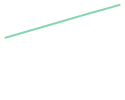

In [50]:
streetDF.loc[19, 'geometry']

### Plot what I got...

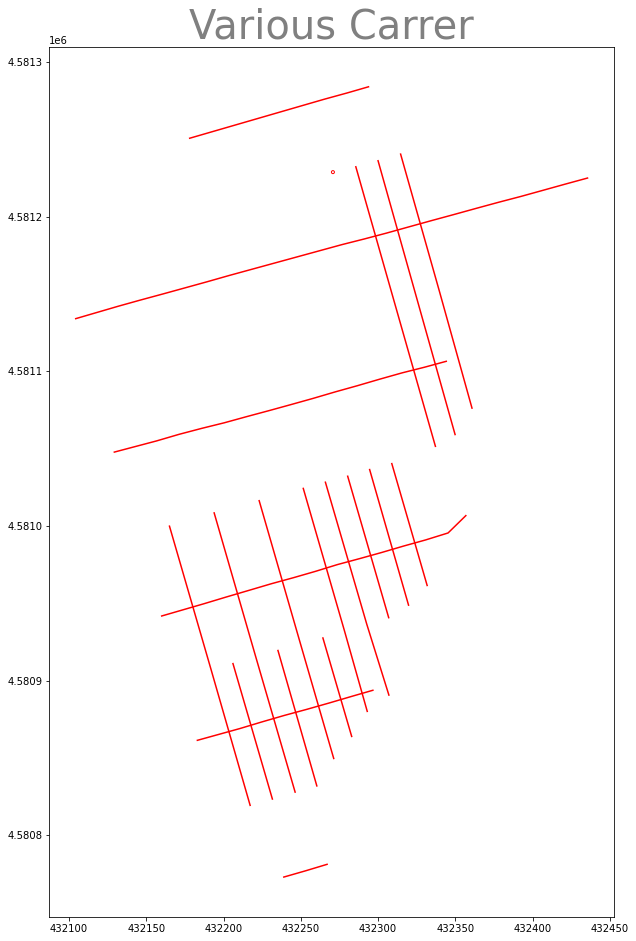

In [51]:
fig, ax = plt.subplots(figsize=(16,16))

fc1 = colorConverter.to_rgba('green', alpha=0.2)

streetDF[0:1500].plot(ax=ax, facecolor = 'none', edgecolor = 'r', marker = '.', aspect = 1) 

plt.title("Various Carrer", fontsize=40, color='grey')
#plt.xlim(426000, 434000)
#plt.ylim(4580000, 4588000)
#plt.axis('equal')

plt.show()

### Explorations Saving:

This is the recommended path to saving the data frame that we have created here. When I tried to execute I got an error message "SERIES has no attribute has_z". I interpreted this to mean that it wanted a z value for all the shapely objects but when I went back and added a z=0 to everything there was no change. [This stackexchange](https://gis.stackexchange.com/questions/327748/attributeerror-series-object-has-no-attribute-has-z) post provided the clue - what the hell would I do without stackexchange? When I created the data frame I labeled the column 'geometry' but that doesn't mean that Geopandas 'knows' that is the geometry column. Using the .set_geometry method makes the geometry column formally recognizable by geopandas.

```python
streetDF.set_geometry(col='geometry', inplace=True)
gdf.to_file('dataframe.geojson', driver='GeoJSON')  
```

In [41]:
streetDF.set_geometry(col='geometry', inplace=True)

In [53]:
streetDF.to_file('bcn-geodata/myData/tramsBCN.geojson', driver = 'GeoJSON')  

### Odd Streets:

There are some odd streets that feel like their data points are not sequential in the data frame. This probably leads to unfortunate line segments. This next set of cells allows me to pick out particular examples and see if there is a fix in the code.

**Results:** After some struggle it appears that the problem with some of the 'way points' for the trams is that they are not in order. It doesn't happen for most trams but does for some. The larger fix is probably to determine the range of each x and y list and order based on the larger range (is it a north-south or east-west street). The next challenge is how to do that within either the list of tuples or in the LineString itself. Hmmmm.....

[list.sort](https://docs.python.org/3/howto/sorting.html) seems to be a tool that might solve my issue relatively efficiently. The basic usage (without fancy lambda methods) reorders the list and if the elements are tuples (my case) it orders first on the first element (which would be the COORD_X) and then resolves any conflicts by sorting on the second element (COORD_Y).

For the particular problem case explored here (Carrer Escudellers) it definitely seems to do the job. With some trepidation I am going to embed this in the broader code above and see what happens.

In [181]:
streetTest = 'Carrer Escudellers'
streetPts = tramsShort[tramsShort['NVia_D'] == streetTest]
streetPts

,geometry,COORD_X,COORD_Y,NVia_D
874,POINT (431144.261 4581245.668),431144.261,4581245.668,Carrer Escudellers
875,POINT (431158.930 4581263.088),431158.930,4581263.088,Carrer Escudellers
883,POINT (431221.139 4581310.401),431221.139,4581310.401,Carrer Escudellers
884,POINT (431104.706 4581192.255),431104.706,4581192.255,Carrer Escudellers
885,POINT (431120.143 4581213.602),431120.143,4581213.602,Carrer Escudellers


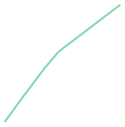

In [207]:
testList = []
i = 0
testTramX = streetPts.COORD_X.tolist()
testTramY = streetPts.COORD_Y.tolist()
dataTst = len(testTramX)

while (i < dataTst):
    testList += [(testTramX[i], testTramY[i])]
    i = i + 1

testList.sort()
testLine = LineString(testList)
testLine

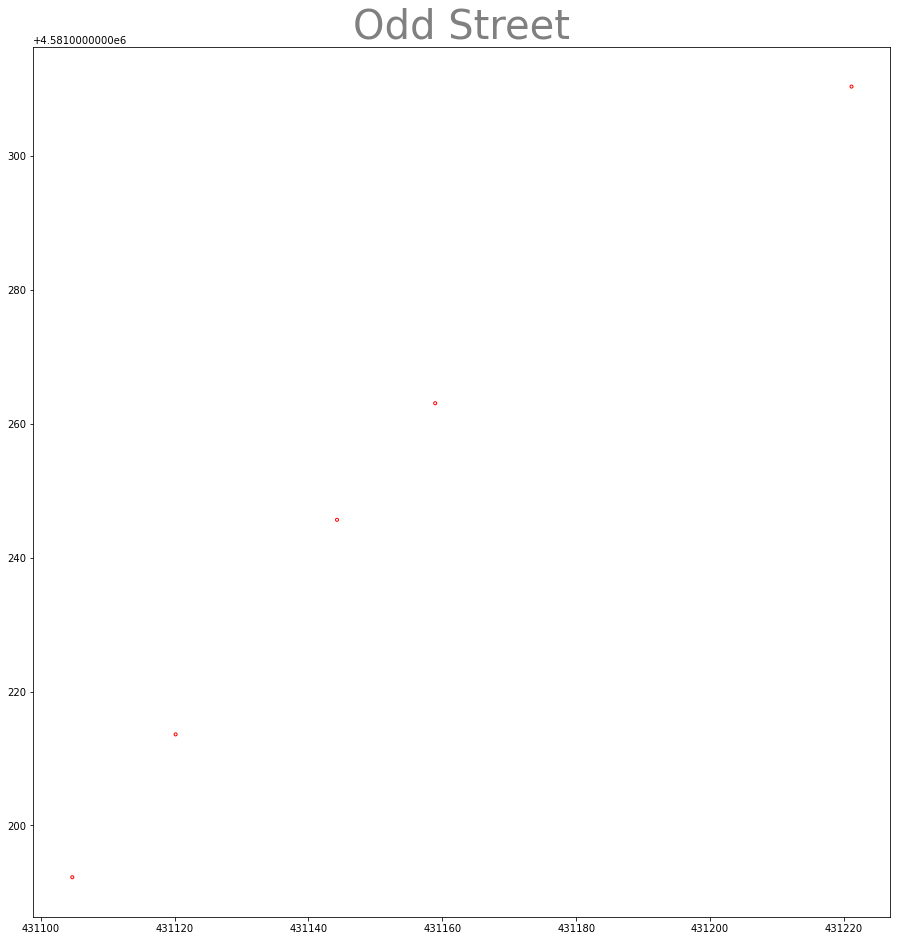

In [208]:
fig4, ax4 = plt.subplots(figsize=(16,16))

fc1 = colorConverter.to_rgba('green', alpha=0.2)

streetPts.plot(ax=ax4, facecolor = 'none', edgecolor = 'r', marker = '.', aspect = 1) 

plt.title("Odd Street", fontsize=40, color='grey')
#plt.xlim(426000, 434000)
#plt.ylim(4580000, 4588000)
#plt.axis('equal')

plt.show()